## Python for Finance
Hi everyone in this series, we're going to run through the basics of importing financial (stock) data into Python using the Pandas framework. From here, we'll manipulate the data and attempt to come up with some sort of system for investing in companies, apply some machine learning, even some deep learning, and then learn how to back-test a strategy.

In [3]:
#import the following libraries
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web

In [4]:
style.use('ggplot')
#start and end date
start = dt.datetime(2015, 1, 1)
end = dt.datetime.now()

In [6]:
#pull the data from yahoo finance
df = web.DataReader("TSLA", 'yahoo', start, end)

In [7]:
print(df.head())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2014-12-31  223.089996  225.679993  222.250000  222.410004  222.410004   
2015-01-02  222.869995  223.250000  213.259995  219.309998  219.309998   
2015-01-05  214.550003  216.500000  207.160004  210.089996  210.089996   
2015-01-06  210.059998  214.199997  204.210007  211.279999  211.279999   
2015-01-07  213.350006  214.779999  209.779999  210.949997  210.949997   

             Volume  
Date                 
2014-12-31  2402100  
2015-01-02  4764400  
2015-01-05  5368500  
2015-01-06  6261900  
2015-01-07  2968400  


In [8]:
## we can actually pull the data and save as a csv file
df.to_csv('tsla.csv')

### Read the save csv file using pandas read_csv 

In [9]:
df = pd.read_csv('tsla.csv', parse_dates=True, index_col= 0)

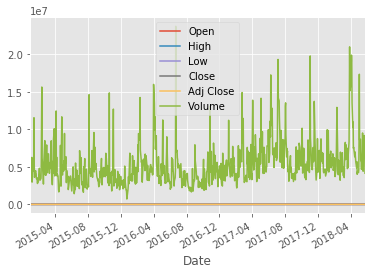

In [10]:
df.plot()

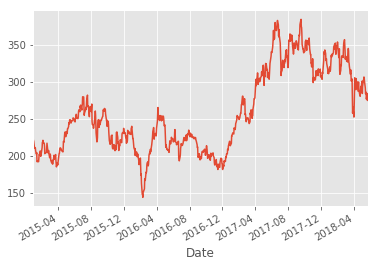

In [11]:
#lets plot just the adj. close 
df['Adj Close'].plot()
plt.show()

In [12]:
# we can reference very specify things
print(df[['Open', 'High', 'Close']].head())

                  Open        High       Close
Date                                          
2014-12-31  223.089996  225.679993  222.410004
2015-01-02  222.869995  223.250000  219.309998
2015-01-05  214.550003  216.500000  210.089996
2015-01-06  210.059998  214.199997  211.279999
2015-01-07  213.350006  214.779999  210.949997


## Basic Stock data Manipulation

In [16]:
## create new columnes - 100 moving average
df['100ma'] = df['Adj Close'].rolling(window=100).mean()
print(df.tail())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-05-18  284.649994  284.649994  274.000000  276.820007  276.820007   
2018-05-21  281.329987  291.489990  281.299988  284.489990  284.489990   
2018-05-22  287.760010  288.000000  273.420013  275.010010  275.010010   
2018-05-23  277.760010  279.910004  274.000000  279.070007  279.070007   
2018-05-24  278.399994  281.109985  274.890015  277.850006  277.850006   

             Volume     100ma  
Date                           
2018-05-18  7251900  315.8781  
2018-05-21  9182600  315.5501  
2018-05-22  8945800  315.1838  
2018-05-23  5953100  314.8209  
2018-05-24  4147069  314.4859  


when we do print(df.head()) we see alot of NAN we can actually drop the NAN columns

In [17]:
print(df.head())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2014-12-31  223.089996  225.679993  222.250000  222.410004  222.410004   
2015-01-02  222.869995  223.250000  213.259995  219.309998  219.309998   
2015-01-05  214.550003  216.500000  207.160004  210.089996  210.089996   
2015-01-06  210.059998  214.199997  204.210007  211.279999  211.279999   
2015-01-07  213.350006  214.779999  209.779999  210.949997  210.949997   

             Volume  100ma  
Date                        
2014-12-31  2402100    NaN  
2015-01-02  4764400    NaN  
2015-01-05  5368500    NaN  
2015-01-06  6261900    NaN  
2015-01-07  2968400    NaN  


In [18]:
df.dropna(inplace=True)

In [19]:
print(df.head())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2015-05-26  247.679993  252.000000  246.500000  247.460007  247.460007   
2015-05-27  248.509995  249.500000  245.550003  247.429993  247.429993   
2015-05-28  247.029999  251.800003  245.050003  251.449997  251.449997   
2015-05-29  251.000000  252.869995  249.429993  250.800003  250.800003   
2015-06-01  251.410004  251.600006  247.470001  249.449997  249.449997   

             Volume       100ma  
Date                             
2015-05-26  3498700  211.126801  
2015-05-27  3408200  211.377000  
2015-05-28  3647300  211.698400  
2015-05-29  3781700  212.105500  
2015-06-01  2505100  212.487200  


So all the columns with NAN has been remove

In [ ]:
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1)

ax1.plo